<a href="https://colab.research.google.com/github/castudil/Machine-Learning/blob/main/Proyecto%20Final%20ML/%20Entrega%2003%20-%20Explore/%20Entrega_03_Explore_Plantilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###OBTAIN


In [69]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

UCI-HAR, este conjunto considera 30 voluntarios en un rango de edad de 19 a 48 año. Cada uno realiza 6 actividades (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) 

El proceso utiliza señales de un acelerómetro y giroscopio desde la utilización de un teléfono inteligente (Samsung Galaxy SII) ubicado en la cintura de cada sujeto, capturamos la aceleración lineal de 3 ejes. Los experimentos han sido grabados en video para etiquetar los datos manualmente.

El conjunto de datos obtenido se dividió aleatoriamente en dos conjuntos, donde se seleccionó el 70 % de los voluntarios para generar los datos de entrenamiento y el 30 % para los datos de prueba.

URL ('https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones')

In [30]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

In [34]:
!unzip UCI\ HAR\ Dataset.zip

Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: UCI HAR Dataset/README.txt  
  inflating: __MACOSX/UCI HAR Dataset/._README.txt  
   creating: UCI HAR Dataset/test/
   creating: UCI HAR Dataset/test/Inertial Signals/
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
   creating: __MACOSX/UCI HAR Dataset/test/
   creating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/
  inflating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_acc_x_test.txt  
  inflating: UCI HAR

In [39]:
# obtener las características del archivo características.txt
features = list()
with open('UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [40]:
# obtener los datos de los archivos txt en el marco de datos de pandas
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', 
                      delim_whitespace=True, header=None)

In [41]:
X_train.columns = features

In [42]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [43]:
# agregue la columna de asunto al marco de datos
X_train['subject'] = pd.read_csv('UCI HAR Dataset/train/subject_train.txt',  header=None, squeeze=True)
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})

In [44]:
# poner todas las columnas en un solo marco de datos
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
6172,0.270046,0.009288,-0.080244,-0.340323,-0.19158,-0.336408,-0.401335,-0.187551,-0.341227,0.123557,...,0.246772,-0.416579,-0.647369,0.141359,-0.707084,0.23233,0.174145,27,1,WALKING


In [45]:
train.shape

(7352, 564)

In [46]:
# obtener los datos de los archivos txt en el marco de datos de pandas
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)

X_test.columns = features

In [47]:
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [48]:
# agregue la columna de asunto al marco de datos
X_test['subject'] = pd.read_csv('UCI HAR Dataset/test/subject_test.txt', header=None, squeeze=True)

# obtener y etiquetas del archivo txt
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', names=['Activity'], squeeze=True)

y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})

In [49]:
# poner todas las columnas en un solo marco de datos
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1808,0.344796,0.022602,-0.141412,0.083207,0.287383,-0.283393,0.055963,0.199504,-0.322693,0.213887,...,-0.215288,-0.337069,0.818444,-0.09386,-0.798768,0.236754,0.005933,13,3,WALKING_DOWNSTAIRS


###SCRUB

Comprobación de valores duplicados

In [50]:
print('Duplicados en train: {}'.format(sum(train.duplicated())))
print('Duplicados en test : {}'.format(sum(test.duplicated())))

Duplicados en train: 0
Duplicados en test : 0


Comprobación de valores nulos

In [51]:
print('Tenemos {} valores NaN/Null en train'.format(train.isnull().values.sum()))
print('Tenemos {} valores NaN/Null enn test'.format(test.isnull().values.sum()))

Tenemos 0 valores NaN/Null en train
Tenemos 0 valores NaN/Null enn test


###EXPLORE

Comprobación de desequilibrios de datos:

**- El desbalance se provoca cuando:** En problemas de clasificación entre las múltiples categorías (de training) solemos encontrar que alguna de ellas presenta pocas muestras. Esto provoca un desbalanceo en los datos que utilizaremos para el entrenamiento. 

**- Cómo afectan los datos desbalanceados:**  Por lo general afecta a los algoritmos y perjudican a las clases minoritarias.Por ejemplo: si a una red neuronal le damos 990 de fotos de gatos y sólo 10 de perros, no podemos pretender que logre diferenciar una clase de otra. Lo más probable que la red se limite a responder “tu foto es un gato” puesto que así tuvo un acierto del 99% en su fase de entrenamiento.

Si sólo tenemos en cuenta a la clase mayoritaria podemos estar teniendo una 'falsa' sensación de que el modelo funciona bien. Cuando tenemos un dataset con desequilibrio, suele ocurrir que obtenemos un alto valor de Accuracy en la clase Mayoritaria y un bajo Recall en la clase Minoritaria

La finalidad de balancear los datos es para evitar una predicción erronea

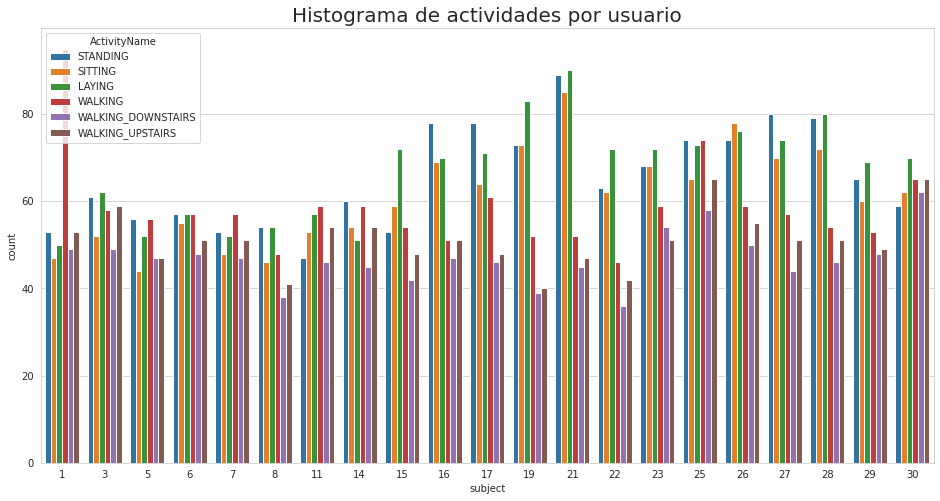

In [52]:
plt.figure(figsize=(16,8))
plt.title('Histograma de actividades por usuario', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()



En esta FIGURA se pueden visualizar un hitograma donde en el eje $x$ se encuentran los 30 individuos, especificando las 6 actividades que realizaron cada uno. Mientras que en el eje $y$ se visualiza el total de instancias ejecutadas por actividad. 

Cada individuo realiza 6 actividades, donde se muestra en el mismo orden cada una de las actividades. Los nombres de las personas permanece anónimo, en su lugar se reemplaza un número identificador.

Las actividades ejecutadas en este caso fueron: 'pararse', 'sentarse', 'acostarse', 'caminar', 'bajar escaleras' y 'subir escaleras'.

***Como se muestra en la FIGURA ANTERIOR, se puede encontrar que los datos son seudo equilibrados, lo que indica que el conjunto de datos puede ser adecuado para el desarrollo de este proyecto.***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


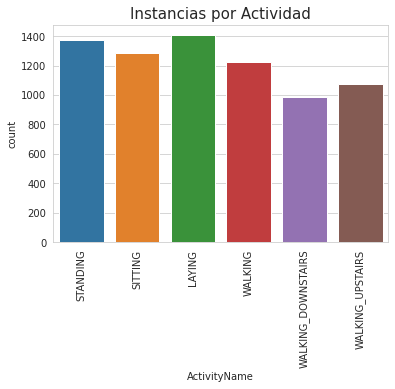

In [53]:
plt.title('Instancias por Actividad', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

In [54]:
train.ActivityName.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: ActivityName, dtype: int64

Con este histograma también se puede representar la cantidad de instancias que ocurre cada actividad, donde en el eje $x$ se encuentran las 6 actividades realizadas con barras de difenrente color, mientras que en el eje $y$ dr visualiza la cantidad total de muestras. 

Este histograma a diferencia del anterior no hace diferencia entre usuarios, simplemente se enfoca en la actividad y su cantidad.

In [55]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

In [56]:
columns = train.columns

# Reemplaza '()', '-' y ',' de los nombres de las columnas
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')
train.columns = columns
test.columns = columns
test.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

tBodyAccMagmean



In [57]:
len(train.tBodyAccMagmean)

7352

In [58]:
train.tBodyAccMagmean.head(n=15)

0    -0.959434
1    -0.979289
2    -0.983703
3    -0.986542
4    -0.992827
5    -0.994295
6    -0.987466
7    -0.977458
8    -0.983631
9    -0.986772
10   -0.988040
11   -0.994776
12   -0.995325
13   -0.996700
14   -0.904588
Name: tBodyAccMagmean, dtype: float64

(array([3862.,  128.,   90.,  729., 1315.,  811.,  346.,   45.,   20.,
           6.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

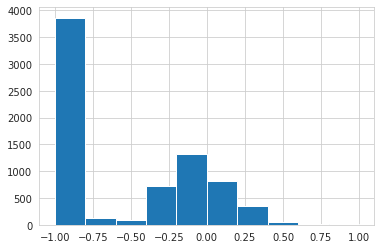

In [59]:
plt.hist(train.tBodyAccMagmean)

El histograma de frecuencia es un gráfico que se usa para presentar las frecuencias absolutas de los valores de una distribución en el cual la altura del punto asociado a un valor de las variables es proporcional a la frecuencia de dicho valor.

A diferencia de un gráfico de barra, el histograma de frecuencia los rangos en el eje $x$ son continuos. Por esta razón se debe determinar un tamaño del bin que denota un rango de los elementos para esa barra en particular. La altura de la barra determina la cantidad de veces que se repite la ocurrencia de los valores en ese rango. A mayor distancia o longitud de la barra mayor repetición del elemento en particular.

Éste gráfico se construye fusionando todas las actividades de todos los individuos registrados en el conjunto de datos. El objetivo es conocer la distribución de datos que rige a las actividades. En este caso estamos poniendo atención en el valor del acelerómetro. Podríamos concluir otro histograma focalizándonos en otra variable. 

Enfocados en este gráfico se puede visualizar que en el eje $x$ estan los valores capturados por el acelerómetros y en el eje $y$ la suma de instancias que se encuentra por cada valor de medición.

Por otro lado al construir un histograma pero esta vez separando las actividades podemos ver diferencias en la distribución de los datos, lo que puede entregar luces respecto a diferencias en los patrones de la acelerómetro para diferenciar entre actividades.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplo

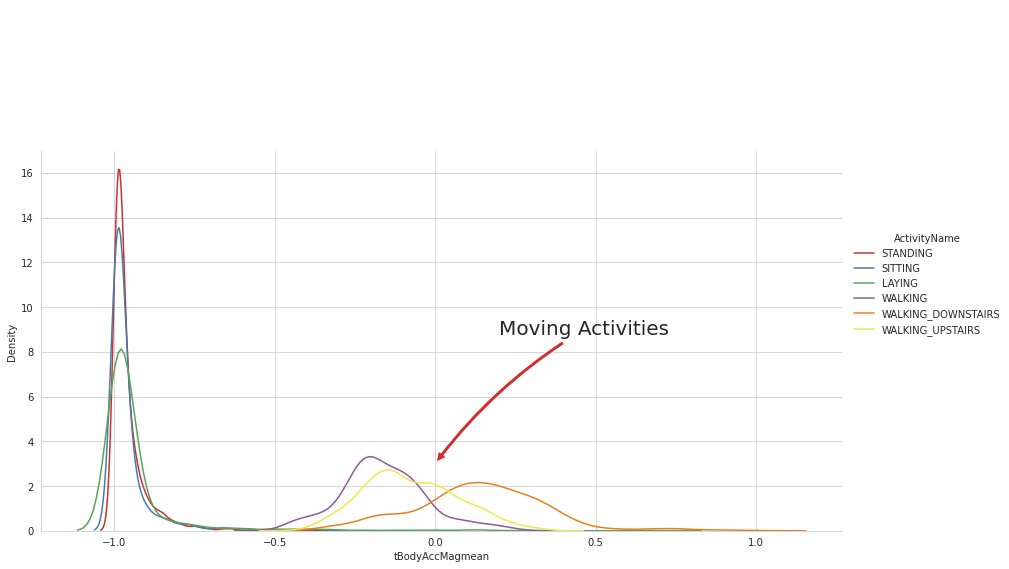

In [60]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()


El siguiente gráfico muestra un histograma para cada una de las seis actividades. En vez de mostrar barras se muestra un suavizado de la curva para tener una idea de la distribución de los datos. Cada color representa una actividad y que está indica en la leyenda. Del gráfico se puede inferir que existen distintos patrones gobernando las distintas actividades. Por ejemplo entre los valores -0,5 y 1,0 prácticamente no está presente la señal verde que corresponde a la actividad de permanecer acostado. Sin embargo en ese mismo rango se registra una presencia de las actividades caminar, subir escaleras y bajar escaleras.

Éstas diferencias en el histograma pueden ser clave para determinar que efectivamente es posible encontrar patrones que distingan entre una actividad y otra.

En este caso solamente estamos considerando una dimensión, entonces es posible hipotetizar que al considerar más de una variable de manera simultánea la distinción será aún más marcada. ('tBodyAccMagmean')

En la parte central del histograma coincide que se encuentran las actividades que involucran el movimiento humano como caminar subir y bajar escaleras y que están indicadas con una flecha roja.


***Sobre la base de los datos dados, se dibujan los gráficos de seis estados activos, como se muestra en la FIGURA ANTERIOR.***

In [61]:
# para fines de trazado, llevar puntos de datos de cada actividad a un marco de datos diferente
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

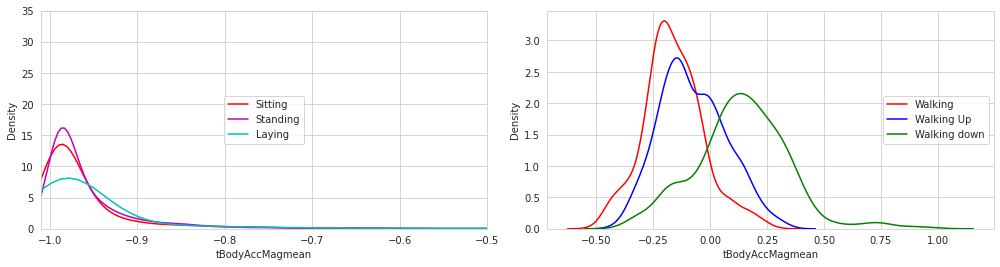

In [62]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

Debido a los hallazgos obtenidos en los gráficos anteriores, se decide separar las actividades entre aquellas que involucran el movimiento humano de aquellas en donde el individuo permanece estático. En este caso las actividades dinámicas corresponden a tres y también las actividades estáticas son tres.

Las actividades dinámicas involucran 'caminar' 'subir escaleras' y 'bajar escaleras'. Mientras que las actividades estáticas consideran permanecer 'sentado', 'levantarse' y estar 'acostado'.
Observé que los rangos en histograma dónde se marca la presencia de la actividades dinámicas y estáticas son distintas.

Si consideramos solamente las actividades estáticas, dentro del rango -1,0 y -0,9 es posible establecer diferencias en los patrones. Análogamente entre los rangos -0,5 y 0,5 es posible percibir diferencias en los valores del acelerometro para las actividades dinámicas.

Si tuviéramos que realizar un clasificador basándonos solamente en esta variable, ya podríamos tener resultados con cierto nivel de certeza dado que visualmente logramos ver las diferencias en los patrones.

Considerando también las diferencias en las otras variables en la construcción del clasificador uno esperaría mejores niveles de reconocimiento.

Otro elemento que llama la atención es que las seis curvas formadas tienen una forma parecida a una distribución normal.

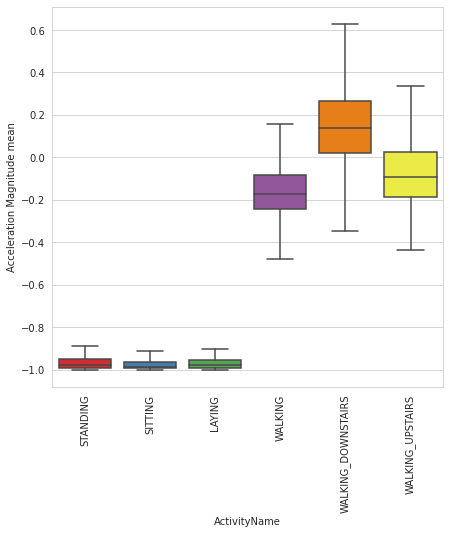

In [63]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.xticks(rotation=90)
plt.show()

Otra perspectiva de los datos consiste en la construcción de diagramas de caja. En este caso se construyeron “boxplot”  para cada una de las seis actividades considerando la misma medida de la acelerómetro utilizada en los histogramas anteriores. La magnitud de una aceleración puede separar los boxplot, identificando:

1. Si tAccMean es < −0.8, entonces las actividades son de pie, sentado o acostado.

2. Si tAccMean es > −0.6, entonces las actividades son Caminar o Bajar escaleras o Subir escaleras.

3. Si tAccMean > 0.0 entonces la actividad es bajar las escaleras.

4. Podemos clasificar el 75% de las etiquetas de Acitivity con algunos errores. 


Los histograma confirman la diferencia entre las actividades llamadas estáticas y las dinámicas.

Focalizándonos en las actividades dinámicas vemos también una notoria diferencia en las medias.

Para el caso de las actividades estáticas las diferencias son menos claras.Intuitivamente da la impresión que diferenciar las actividades estáticas basándonos exclusivamente en la información de la acelerómetro es una tarea difícil.

También aparece claro que diferenciar entre una actividad estática y dinámica y sencillo a partir de la información de la información del  acelerometrometro.


angleXgravityMean

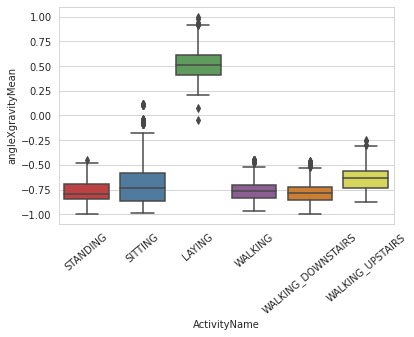

In [64]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.xticks(rotation = 40)
plt.show()


También se puede trabajar con el componente de aceleracion de la gravedad, en este caso porque se tienen los datos disponibles. 

Aquí ver un boxplot donde si angleX, gravityMean > 0.0, la acción en progreso es estar 'acostado'.

Este proceso también se realiza para los ejes de $y$ (angleYgravityMean) y $z$ (angleZgravityMean)


angleYgravityMean

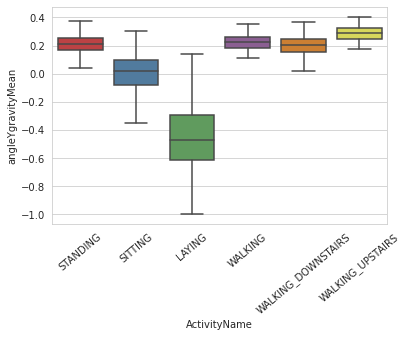

In [65]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.xticks(rotation = 40)
plt.show()

angleZgravityMean

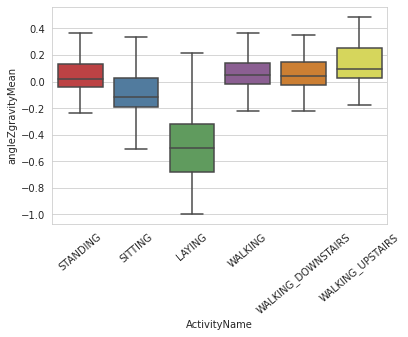

In [66]:
sns.boxplot(x='ActivityName', y='angleZgravityMean', data = train, showfliers=False)
plt.xticks(rotation = 40)
plt.show()

**Aplicar t-sne en los datos**



T Distributed Stochastic Neighbor Embedding (t-SNE) es una técnica de reducción de dimensionalidad utilizada para visualizar conjuntos de datos de alta dimensión en espacios bidimensionales o tridimensionales de baja dimensión. En comparación con otros algoritmos de reducción de dimensionalidad (como PCA), t-SNE crea un espacio de características reducido, con muestras similares modeladas por puntos cercanos y muestras diferentes modeladas por puntos distantes de alta probabilidad.

t-SNE integra la reducción de dimensionalidad y la visualización. 


**En la siguientes gráficas se utiliza t-SNE, con perplexity: 2, 5, 10, 20, 50 respectivamente, y el número máximo de iteraciones (1000).**

In [67]:
# realiza t-sne con diferentes valores de perplejidad y sus respectivas tramas..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # realizar t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity, n_jobs=-1).fit_transform(X_data)
        print('Done..')
        
        # preparar los datos para seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # dibujar la trama en el lugar apropiado en la cuadrícula
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.003s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 7352 samples in 2.441s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597443
[t-SNE] Computed conditional probabilities in 0.048s
[t-SNE] Iteration 50: error = 124.7535553, gradient norm = 0.0275550 (50 iterations in 2.806s)
[t-SNE] Iteration 100: error = 107.3962021, gradient norm = 0.0330043 (50 iterations in 1.843s)
[t-SNE] Iteration 150: error = 100.9541931, gradient norm = 0.0205888 (50 iterations in 1.493s)
[t-SNE] Iteration 200: error = 97.5305710, gra

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


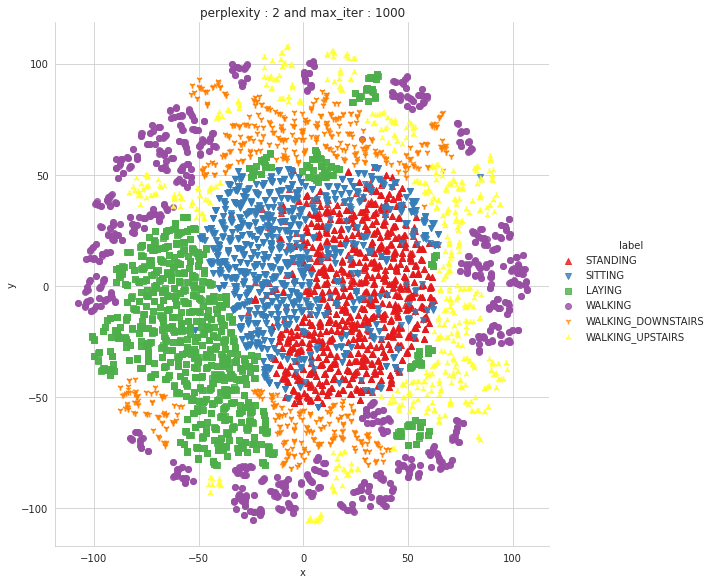

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.003s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 7352 samples in 2.353s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.054s
[t-SNE] Iteration 50: error = 114.2198944, gradient norm = 0.0193917 (50 iterations in 3.004s)
[t-SNE] Iteration 100: error = 97.8873215, gradient norm = 0.0168588 (50 iterations in 1.939s)
[t-SNE] Iteration 150: error = 93.3570709, gradient norm = 0.0091445 (50 iterations in 1.621s)
[t-SNE] Iteration 200: error = 91.3351822, gradi

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


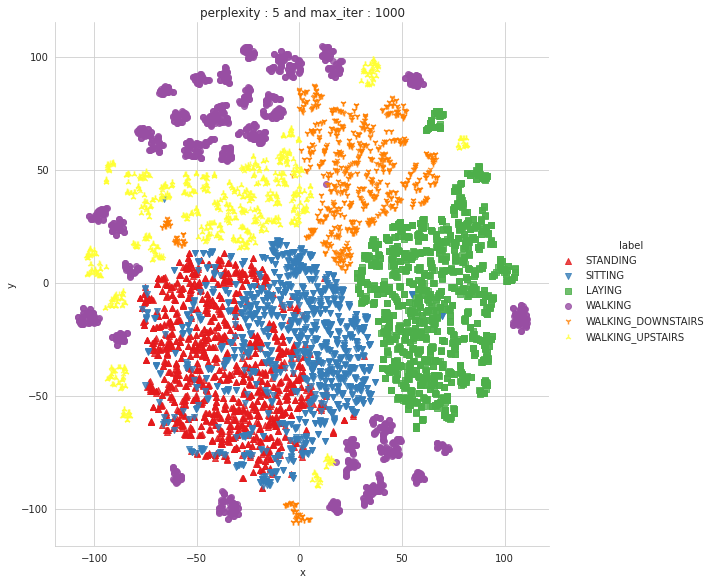

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.003s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 7352 samples in 2.356s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.099s
[t-SNE] Iteration 50: error = 105.6546021, gradient norm = 0.0211009 (50 iterations in 2.564s)
[t-SNE] Iteration 100: error = 90.1007080, gradient norm = 0.0109452 (50 iterations in 2.008s)
[t-SNE] Iteration 150: error = 87.1765442, gradient norm = 0.0065352 (50 iterations in 1.747s)
[t-SNE] Iteration 200: error = 85.9525909, gradi

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


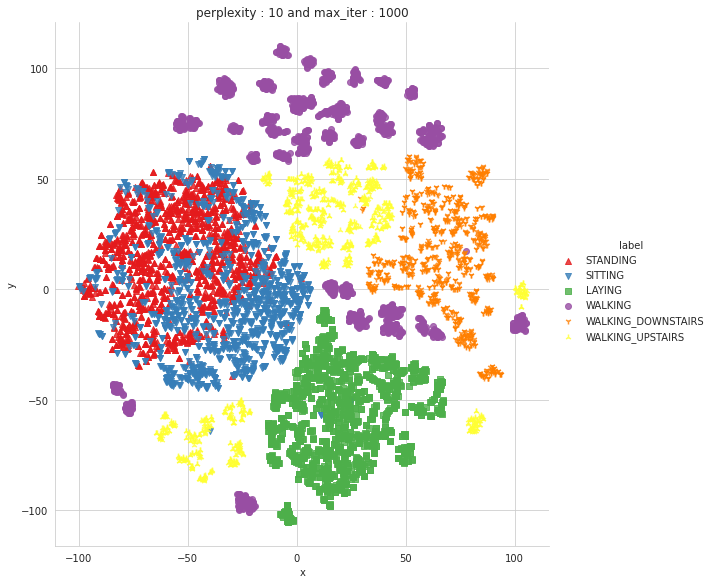

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.003s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 7352 samples in 2.395s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.193s
[t-SNE] Iteration 50: error = 97.2155762, gradient norm = 0.0227616 (50 iterations in 2.827s)
[t-SNE] Iteration 100: error = 84.0250397, gradient norm = 0.0059936 (50 iterations in 2.164s)
[t-SNE] Iteration 150: error = 81.9875870, gradient norm = 0.0032974 (50 iterations in 2.528s)
[t-SNE] Iteration 200: error = 81.1715164, gradie

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


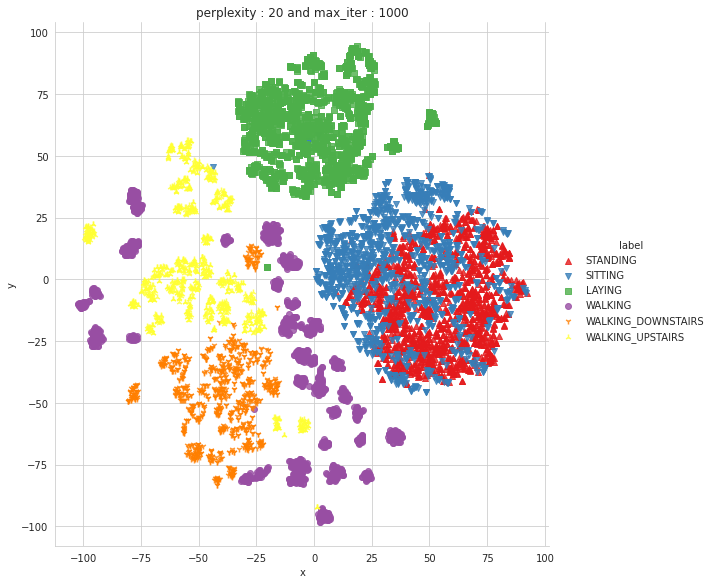

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.004s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 7352 samples in 2.577s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.478s
[t-SNE] Iteration 50: error = 84.8430328, gradient norm = 0.0363696 (50 iterations in 3.889s)
[t-SNE] Iteration 100: error = 75.5150299, gradient norm = 0.0065059 (50 iterations in 3.443s)
[t-SNE] Iteration 150: error = 74.6132660, gradient norm = 0.0019827 (50 iterations in 2.700s)
[t-SNE] Iteration 200: error = 74.2862549, gradie

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


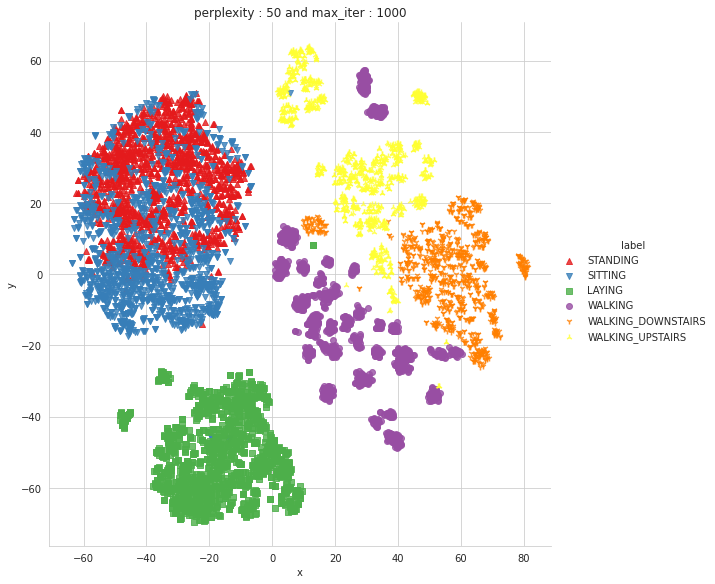

Done


In [68]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])